# Fractal Interpolation of a given function (Barnsley IFS)

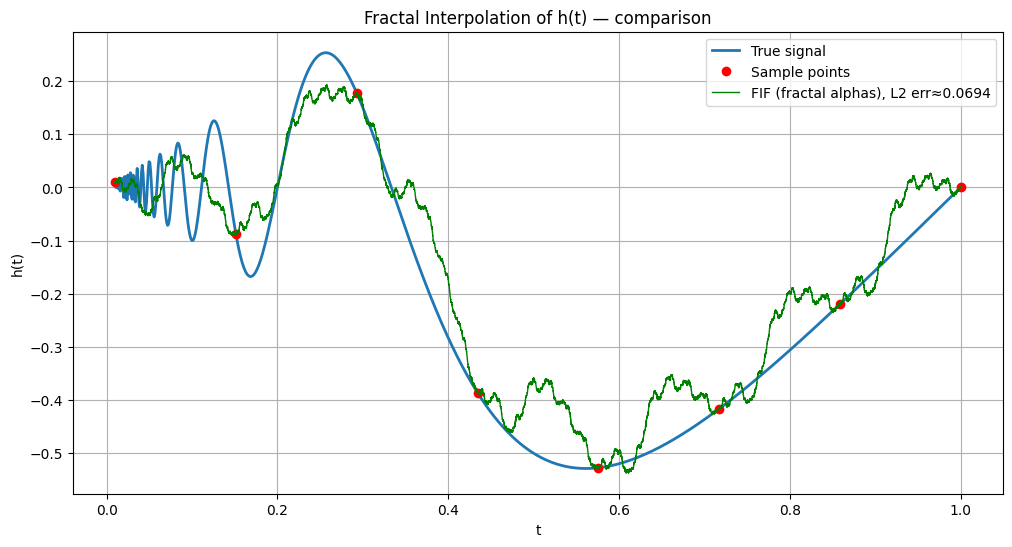


Example alphas (fractal): [-0.2, -0.2, -0.2, -0.2, -0.2, -0.2, -0.2]
L2 error (fractal FIF)  = 0.069396


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random

def h(t):
    return t * np.cos(np.pi / (2 * t))

def build_fif_maps(points, alphas):
    x0, y0 = points[0]
    xN, yN = points[-1]
    maps = []
    for i in range(1, len(points)):
        xi_1, yi_1 = points[i-1]
        xi, yi = points[i]
        alpha_i = alphas[i-1]
        a_i = (xi - xi_1) / (xN - x0)
        e_i = (xN*xi_1 - x0*xi) / (xN - x0)
        b_i = (yi - yi_1 - alpha_i * (yN - y0)) / (xN - x0)
        f_i = yi_1 - alpha_i * y0 - b_i * x0
        maps.append((a_i, e_i, alpha_i, b_i, f_i))
    return maps

def recursive_iteration(maps, depth, x_start, x_end, y_start, y_end):
    if depth == 0:
        return [(x_start, y_start), (x_end, y_end)]
    points_list = []
    for (a_i, e_i, alpha_i, b_i, f_i) in maps:
        x_left = a_i * x_start + e_i
        y_left = alpha_i * y_start + b_i * x_start + f_i
        x_right = a_i * x_end + e_i
        y_right = alpha_i * y_end + b_i * x_end + f_i
        sub_points = recursive_iteration(maps, depth - 1, x_left, x_right, y_left, y_right)
        points_list.extend(sub_points[:-1])
    points_list.append((x_end, y_end))
    return points_list

# Settings (change these to experiment)
n = 8                       # number of sample points
depth = 7                   # recursion depth for FIF
x_samples = np.linspace(0.01, 1, n)
y_samples = h(x_samples)


alphas_fractal = [-0.2 for i in range(n-1)]


maps_fractal = build_fif_maps(list(zip(x_samples, y_samples)), alphas_fractal)
rec_fractal = recursive_iteration(maps_fractal, depth, x_samples[0], x_samples[-1], y_samples[0], y_samples[-1])
rec_fractal = sorted(rec_fractal, key=lambda p: p[0])
xf, yf = zip(*rec_fractal)

t_dense = np.linspace(0.01, 1, 1000)
h_dense = h(t_dense)

f_fractal = interp1d(xf, yf, kind='linear', bounds_error=False, fill_value="extrapolate")
err_fractal = np.linalg.norm(f_fractal(t_dense) - h_dense) / np.sqrt(len(t_dense))

plt.figure(figsize=(12,6))
plt.plot(t_dense, h_dense, label='True signal', linewidth=2)
plt.plot(x_samples, y_samples, 'ro', label='Sample points', markersize=6)
plt.plot(xf, yf, 'g-', linewidth=1, label=f'FIF (fractal alphas), L2 err≈{err_fractal:.4f}')
plt.legend()
plt.title('Fractal Interpolation of h(t) — comparison')
plt.xlabel('t'); plt.ylabel('h(t)'); plt.grid(True)
plt.show()

print("\nExample alphas (fractal):", alphas_fractal)
print(f"L2 error (fractal FIF)  = {err_fractal:.6f}")